In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import np_utils

In [ ]:
dataset = pd.read_csv('heart.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = dataset.iloc[:, 3:-1].values
Y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((272, 10), (272,), (31, 10), (31,))

In [ ]:
dataset.duplicated().sum()

1

In [ ]:
dataset[dataset.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
duplicated_features = dataset[dataset.duplicated()].index.values
print(duplicated_features)

[164]


In [ ]:
unique_df = dataset.drop_duplicates(keep='first').T
unique_df.shape

(14, 302)

In [ ]:
removed_features = [col for col in dataset.columns if col not in unique_df.columns]
removed_features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
from sklearn.feature_selection import VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)
feature_selector.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
feature_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
sum(feature_selector.get_support())

10

In [ ]:
X_train = feature_selector.transform(X_train)
X_test = feature_selector.transform(X_test)
X_train.shape, X_test.shape

((272, 10), (31, 10))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(X, Y, epochs=60, batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/60
10/10 [==============================] - 1s 18ms/step - loss: 18.4087 - accuracy: 0.5380 - val_loss: 0.7934 - val_accuracy: 0.4194
Epoch 2/60
10/10 [==============================] - 0s 4ms/step - loss: 9.6818 - accuracy: 0.4752 - val_loss: 0.8068 - val_accuracy: 0.4516
Epoch 3/60
10/10 [==============================] - 0s 4ms/step - loss: 8.0700 - accuracy: 0.3762 - val_loss: 0.8017 - val_accuracy: 0.4516
Epoch 4/60
10/10 [==============================] - 0s 4ms/step - loss: 7.3408 - accuracy: 0.3795 - val_loss: 0.7840 - val_accuracy: 0.4839
Epoch 5/60
10/10 [==============================] - 0s 4ms/step - loss: 6.3065 - accuracy: 0.4158 - val_loss: 0.7696 - val_accuracy: 0.5484
Epoch 6/60
10/10 [==============================] - 0s 4ms/step - loss: 5.6647 - accuracy: 0.4191 - val_loss: 0.7590 - val_accuracy: 0.5806
Epoch 7/60
10/10 [==============================] - 0s 4ms/step - loss: 4.7852 - accuracy: 0.3960 - val_loss: 0.7463 - val_accuracy: 0.5806
Epoch 8/60
10/10 [

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

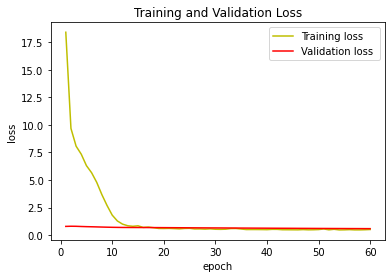

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, len(loss)+1)
#acc=history.history['accuracy']
#val_acc=history.history['val_accuracy']
plt.plot(epochs,loss,'y',label='Training loss ')
plt.plot(epochs,val_loss,'r',label='Validation loss ')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

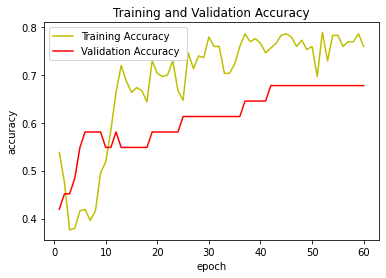

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'y',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy ')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


0.7563025210084033


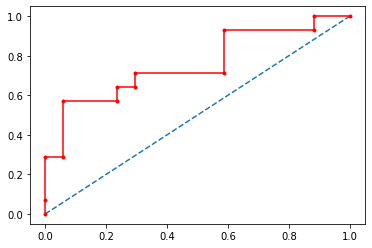

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from tensorflow import keras
probs=model.predict(X_test)
probs=probs[:,0]
auc=roc_auc_score(Y_test,probs)
print(auc)
fpr,tpr,thresh=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker=".",color="red")